Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

1) Predict delivery time using sorting time

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")


In [ ]:
dt = pd.read_csv('/content/delivery_time.csv')
dt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
# checking for no. of rows and columns
dt.shape

(21, 2)

In [ ]:
# checking for data types
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
# checking for null values
dt.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [ ]:
# checking for duplicate values
dt['Delivery Time'].duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x7cb85d1f1600>,
 'caps': [<matplotlib.lines.Line2D at 0x7cb85d1f1b40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cb85d1f1360>,
 'medians': [<matplotlib.lines.Line2D at 0x7cb85d1f2080>,
 'fliers': [<matplotlib.lines.Line2D at 0x7cb85d1f2320>,
 'means': []}

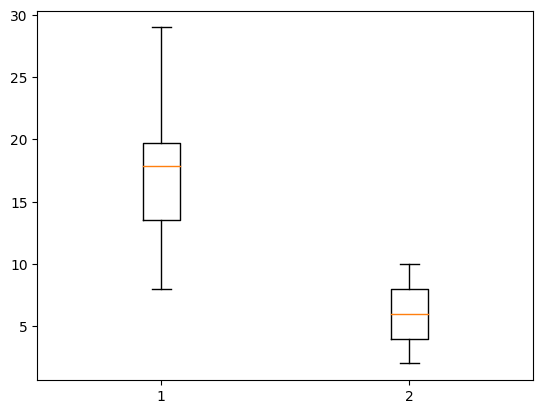

In [ ]:
# checking for outliers
plt.boxplot(dt)

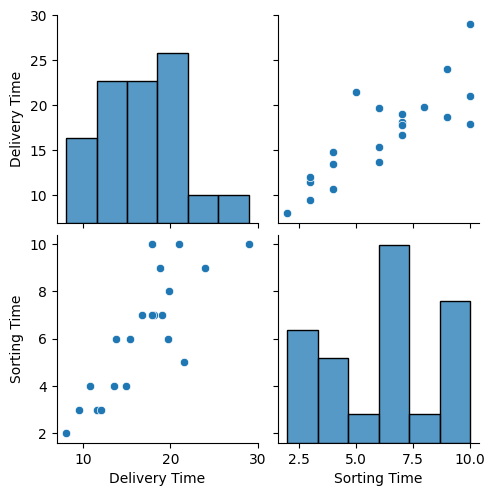

In [ ]:
# plotting pairplot
sns.pairplot(dt)

In [ ]:
# checking the correlation
dt.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='Delivery Time', ylabel='Density'>

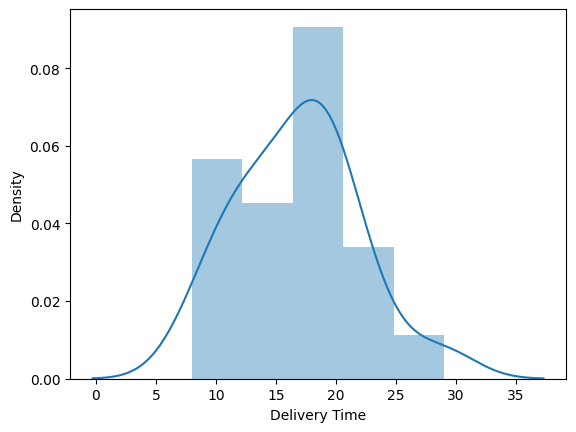

In [ ]:
sns.distplot(dt['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

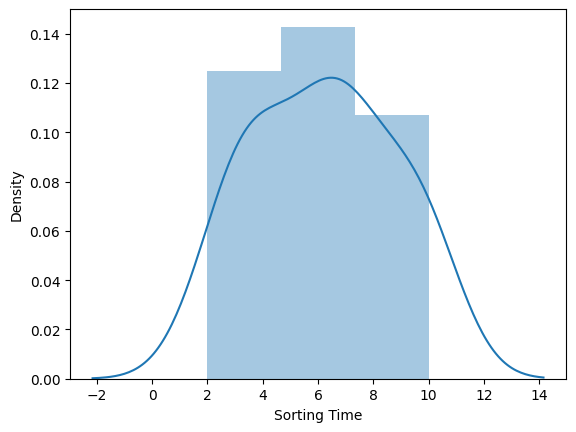

In [ ]:
sns.distplot(dt['Sorting Time'])

<Axes: xlabel='Delivery Time', ylabel='Sorting Time'>

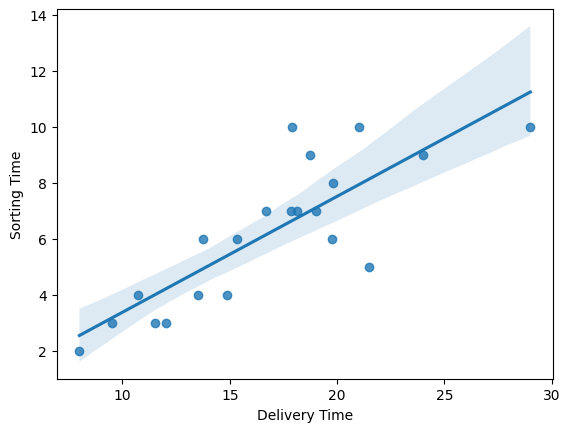

In [ ]:
sns.regplot(x=dt['Delivery Time'], y=dt['Sorting Time'])

In [ ]:
dt = dt.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'} , axis=1)
dt.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## **Model Building**

In [ ]:
model = smf.ols("delivery_time ~ sorting_time", data = dt).fit()

In [ ]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [ ]:
(model.rsquared, model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [ ]:
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [ ]:
print('R_squared =', model.rsquared)

R_squared = 0.6822714748417231


In [ ]:

newdata = pd.Series([4,6,8])
dt_pred = pd.DataFrame(newdata, columns=['sorting_time'])
dt_pred

,sorting_time
0,4
1,6
2,8


In [ ]:
model.predict(dt_pred)

0    13.178814
1    16.476853
2    19.774893
dtype: float64

2) Build a prediction model for Salary_hike

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
s_h = pd.read_csv('/content/Salary_Data.csv')
s_h.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
#rename the col
s_h = s_h.rename({'YearsExperience':'YE'}, axis=1)
s_h.head()

,YE,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
s_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YE      30 non-null     float64
 1   Salary  30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
# Checking the null values
s_h.isna().sum()

YE        0
Salary    0
dtype: int64

In [ ]:
# checking any salary is 0 or less
s_h[s_h['Salary']<= 0]

,YE,Salary


In [ ]:
s_h[s_h.duplicated('YE')]

,YE,Salary
8,3.2,64445.0
12,4.0,56957.0


In [ ]:
sh = s_h.drop_duplicates()
sh.duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x79c5e4954250>,
 'caps': [<matplotlib.lines.Line2D at 0x79c5e4954670>,
 'boxes': [<matplotlib.lines.Line2D at 0x79c5e4927f70>],
 'medians': [<matplotlib.lines.Line2D at 0x79c5e4954bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79c5e4954e50>],
 'means': []}

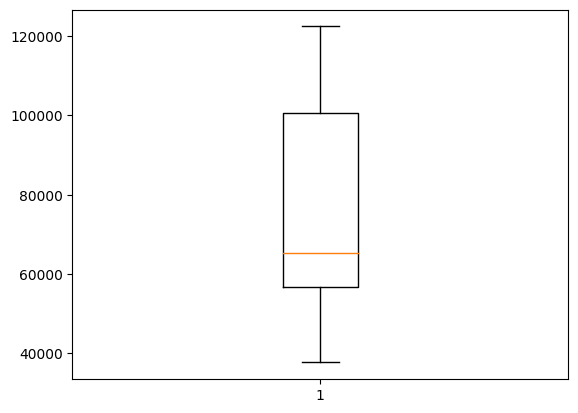

In [ ]:
# checking for outliers
plt.boxplot(sh.Salary)

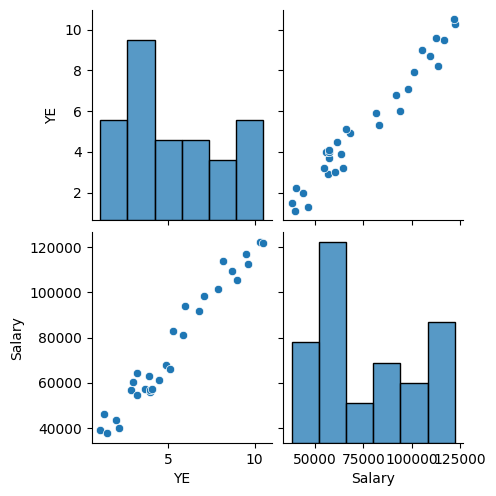

In [ ]:
# creating a pairplot
sns.pairplot (sh)

In [ ]:
# Find the correlation
sh.corr()

,YE,Salary
YE,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='Salary', ylabel='Density'>

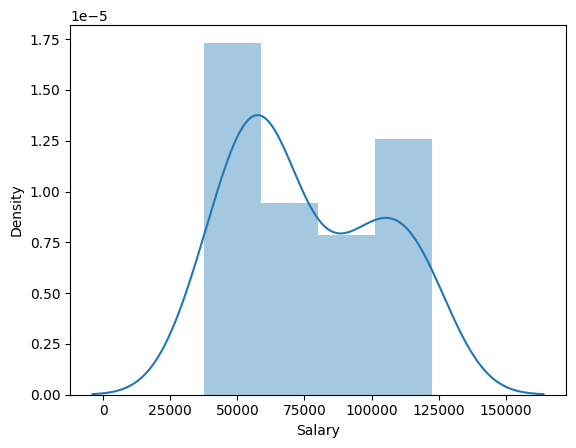

In [ ]:
sns.distplot(sh.Salary)


<Axes: xlabel='YE', ylabel='Density'>

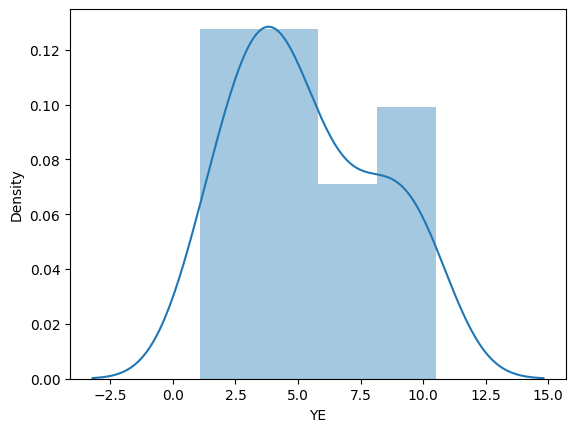

In [ ]:
sns.distplot(sh.YE)

<Axes: xlabel='YE', ylabel='Salary'>

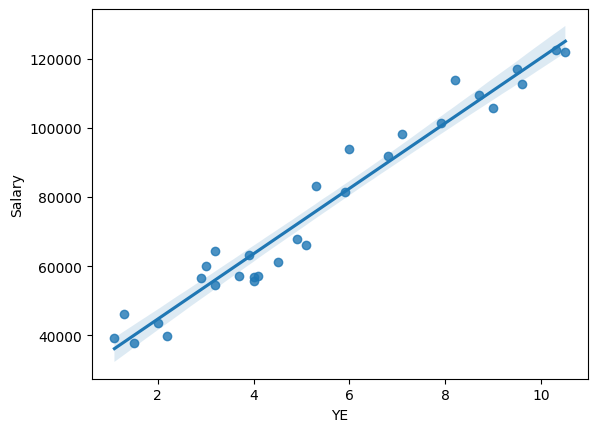

In [ ]:
sns.regplot(x=sh['YE'], y=sh['Salary'])

## **Model Building**

In [ ]:
import statsmodels.formula.api as smf
model1 = smf.ols('Salary~YE', data=sh).fit()

In [ ]:
model1.params

Intercept    25792.200199
YE            9449.962321
dtype: float64

In [ ]:
(model1.rsquared, model1.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [ ]:
# prediction for salary hike

newdata = pd.Series([6,8,10])
sh_pred = pd.DataFrame(newdata, columns=['YE'])
sh_pred

,YE
0,6
1,8
2,10


In [ ]:
model1.predict(sh_pred)

0     82491.974127
1    101391.898770
2    120291.823413
dtype: float64